In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
%matplotlib inline

In [65]:
#df = pd.read_csv("../data/merged_data_clean.csv")
df = pd.read_csv("Data/merged_data_clean.csv")
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTZ,DBQ095Z,DBD100,DRQSPREP,...,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWSZ
0,109266,2,29,6,5.00,5,3,1.0,1.0,4.0,...,1.423,0.000,0.028,0.004,0.007,0.000,2268.9,2268.9,0.0,1.0
1,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
2,109273,1,36,3,0.83,4,3,4.0,NaN,2.0,...,0.328,0.000,0.114,0.005,0.016,0.005,0.0,0.0,0.0,91.0
3,109274,1,68,7,1.20,4,3,4.0,NaN,2.0,...,2.676,0.000,0.209,0.005,0.025,0.035,1800.0,1800.0,0.0,1.0
4,109282,1,76,3,3.61,5,1,1.0,2.0,4.0,...,1.257,0.000,0.062,0.005,0.002,0.006,105.0,105.0,0.0,4.0


In [66]:
df["KIQ026"] = df["KIQ026"].astype('category')
df["SMQ020"] = df["SMQ020"].astype('category')
risk_factor = df[["SMQ020","KIQ026","RXDCOUNT","SLQ050"]]
risk_factor = risk_factor[risk_factor['SMQ020'].isin([1,2])]
risk_factor = risk_factor[risk_factor['SLQ050'].isin([1,2])]
print(risk_factor.shape)

(9195, 4)


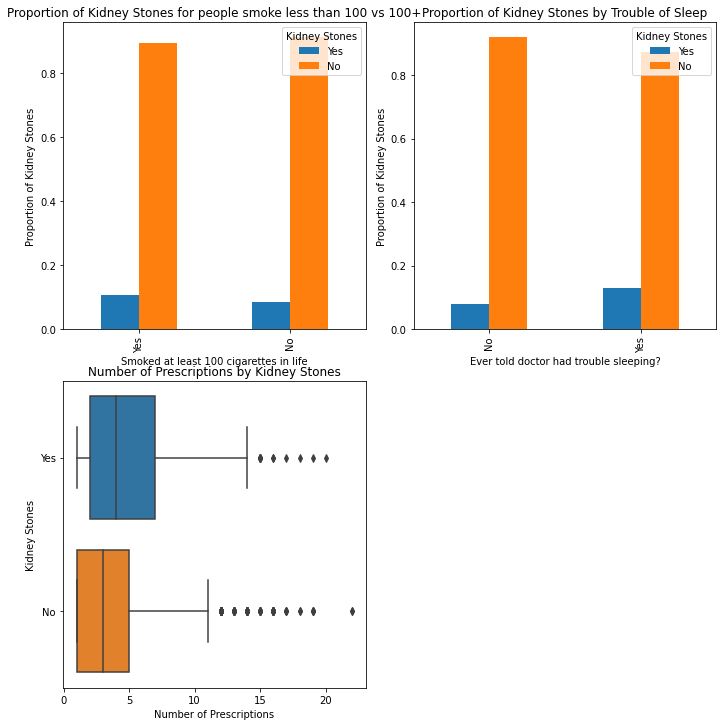

In [68]:
risk_factor["SMQ020"] = df["SMQ020"].map({1: "Yes", 2: "No", 7: "Refused", 9:"Don't know"})
risk_factor["SLQ050"] = df["SLQ050"].map({1: "Yes", 2: "No", 7: "Refused", 9:"Don't know"})
risk_factor["KIQ026"] = df["KIQ026"].map({1: "Yes", 2: "No"})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#gpah 1
cross_tab = pd.crosstab(risk_factor["SMQ020"], risk_factor["KIQ026"], normalize='index')
cross_tab.plot(kind='bar', ax = axes[0,0])
axes[0,0].set_title("Proportion of Kidney Stones for people smoke less than 100 vs 100+")
axes[0,0].set_xlabel("Smoked at least 100 cigarettes in life")
axes[0,0].set_ylabel("Proportion of Kidney Stones")
axes[0,0].legend(title="Kidney Stones")

#gpah 2
cross_tab = pd.crosstab(risk_factor["SLQ050"], risk_factor["KIQ026"], normalize='index')
cross_tab.plot(kind='bar', ax = axes[0,1])
axes[0,1].set_title("Proportion of Kidney Stones by Trouble of Sleep")
axes[0,1].set_xlabel("Ever told doctor had trouble sleeping?")
axes[0,1].set_ylabel("Proportion of Kidney Stones")
axes[0,1].legend(title="Kidney Stones")
plt.tight_layout()


#gpah 3
axes[1, 1].remove()

sns.boxplot(x="RXDCOUNT", y="KIQ026", ax = axes[1, 0], data = risk_factor)
axes[1, 0].set_xlabel('Number of Prescriptions')
axes[1, 0].set_ylabel('Kidney Stones')
axes[1, 0].set_title('Number of Prescriptions by Kidney Stones')


plt.savefig("Risk_Factor_Analysis.png")
plt.show()
